In [2]:
# coding: utf-8
import sys, os
sys.path.append("../예제/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

val acc:0.12 | lr:0.0002236073971029365, weight decay:1.2717077929537296e-05
val acc:0.5 | lr:0.0022655364156975305, weight decay:1.8032985441453224e-06
val acc:0.06 | lr:3.085990968233469e-06, weight decay:5.839084759206562e-07
val acc:0.13 | lr:9.762115617657332e-05, weight decay:7.378797220005383e-07
val acc:0.1 | lr:1.4590994474842764e-06, weight decay:6.707492476599844e-05
val acc:0.09 | lr:1.7015476165143745e-05, weight decay:1.2238704690662282e-06
val acc:0.13 | lr:4.017501339880577e-05, weight decay:2.5749353959818286e-07
val acc:0.72 | lr:0.005383514592190069, weight decay:7.719041571132457e-08
val acc:0.07 | lr:2.930978980210061e-05, weight decay:1.574963976549223e-05
val acc:0.31 | lr:0.001263064766253574, weight decay:2.0028440869689732e-05
val acc:0.15 | lr:0.00042550956366750814, weight decay:1.989644413064059e-06
val acc:0.15 | lr:0.00019716197413621213, weight decay:1.232389978225978e-08
val acc:0.08 | lr:1.0266786327620637e-06, weight decay:2.042332879052146e-08
val ac

Best-11(val acc:0.58) | lr:0.004173029001542008, weight decay:5.3406340197107364e-08
Best-12(val acc:0.57) | lr:0.005574738781015718, weight decay:7.982478817829518e-06
Best-13(val acc:0.5) | lr:0.0022655364156975305, weight decay:1.8032985441453224e-06
Best-14(val acc:0.47) | lr:0.0015842429154582609, weight decay:7.437078104203648e-07
Best-15(val acc:0.47) | lr:0.0027107671782559757, weight decay:1.9451315252092946e-07
Best-16(val acc:0.43) | lr:0.0021692230279547666, weight decay:1.910194712067386e-07
Best-17(val acc:0.4) | lr:0.001391788887636131, weight decay:1.5213799678707587e-08
Best-18(val acc:0.4) | lr:0.002016265025213106, weight decay:3.4446396039898137e-06
Best-19(val acc:0.39) | lr:0.0019499184745943243, weight decay:1.454447370843608e-06
Best-20(val acc:0.38) | lr:0.0016756169061032478, weight decay:5.184378112329521e-08


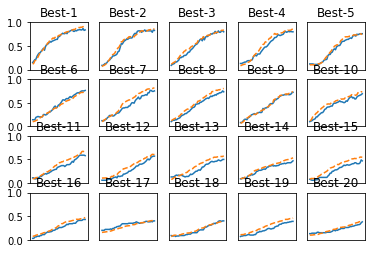

In [4]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()